# Explore Quantum Index Report Full Dataset

In [6]:
#imports

import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib.font_manager import FontProperties

#import quantile regression 
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg
import re



ModuleNotFoundError: No module named 'statsmodels'

In [ ]:

# read in QPU metris from QPUmetric.csv
# read in QPU metrics from QPUmetric.csv



# read in QPU metrics from QPUmetric.csv
csvfile = 'Datasets/QPUmetrics.csv'
# qpu_metrics = pd.read_csv(csvfile)
#forget the first row
qpu_metrics = pd.read_csv(csvfile, skiprows=1)

print(qpu_metrics['w'])
#view dataframe
# qpu_metrics


#only select superconducting qpus ie where modality is superconducting
# print(qpu_metrics.columns)
superconducting_qpus = qpu_metrics[qpu_metrics['Modality'] == 'Superconducting']
# print(superconducting_qpus)
#filter out any qpus with dates either not available or past 2024
superconducting_qpus = superconducting_qpus[superconducting_qpus['w'].notna()]
# print(superconducting_qpus)
superconducting_qpus.dropna(subset=['Qubits/ Qumodes', 'w'], inplace=True)
#removing any QPUs where is comercially available is Future plan
superconducting_qpus = superconducting_qpus[superconducting_qpus['Commercially available?'] != 'Future Plan']
# Remove commas from 'Qubits/ Qumodes' and convert to integer
superconducting_qpus['Qubits/ Qumodes'] = superconducting_qpus['Qubits/ Qumodes'].str.replace(',', '').astype(int)
#make the w column an integer
superconducting_qpus['w'] = superconducting_qpus['w'].astype(int)
superconducting_qpus = superconducting_qpus[superconducting_qpus['w'] <= 2024]
# print(superconducting_qpus['Qubits/ Qumodes'])




0       NaN
1      2018
2      2022
3      2024
4      2024
       ... 
237    2020
238    2024
239    2026
240     NaN
241     NaN
Name: w, Length: 242, dtype: object


In [2]:

# #+====================================================================

# #dealing wit max fit
# superconducting_qpus = superconducting_qpus.sort_values(by='w')

# # Select only the maximum qubit points
# max_qubits = -1
# max_points = []

# for _, row in superconducting_qpus.iterrows():
#     if row['Qubits/ Qumodes'] > max_qubits:
#         max_qubits = row['Qubits/ Qumodes']
#         max_points.append(row)

# max_points = pd.DataFrame(max_points)

# # Define a linear model for fitting (since y = log10(qubits))
# def linear_model(x, a, b):
#     return a * x + b

# # Extract x (year) and y (log10 of qubits) data for fitting
# x_data = max_points['w']  # Year
# y_data = np.log10(max_points['Qubits/ Qumodes'])  # Log10 of number of qubits

# #print the tuple of this data
# print(list(zip(x_data, 10**y_data)))


# # Perform linear fitting
# params, covariance = curve_fit(linear_model, x_data, y_data)

# # Generate fit line
# x_fit = np.linspace(x_data.min(), 2034, 100)

# y_fit = linear_model(x_fit, *params)


# # print(superconducting_qpus)

# # #now I want to plot the number of qubits against the year for entries that have number ofqubits available


# #make a fit of just the data points where the number of qubits is greater than the number of qubits that have come before
# #do a quantile fit on the top 20% of qubits

# # Perform quantile regression on the top 20th percentile and median of qubits
# y_data = np.log10(superconducting_qpus['Qubits/ Qumodes'])
# x_data = superconducting_qpus['w']
# model = QuantReg(y_data, sm.add_constant(x_data))

# # Fit 95th percentile
# res_90 = model.fit(q=0.8)
# slope_q90 = res_90.params["w"]
# intercept_q90 = res_90.params["const"]

# # Fit 80th percentile
# res_80 = model.fit(q=0.9)
# slope_q80 = res_80.params["w"]
# intercept_q80 = res_80.params["const"]

# # Fit 50th percentile (median)
# res_50 = model.fit(q=0.5)
# slope_q50 = res_50.params["w"]
# intercept_q50 = res_50.params["const"]

# x_fit = np.linspace(x_data.min(), 2034, 100)
# # Generate fit lines for quantile regressions
# def linear_model(x, a, b):
#     return a * x + b
# y_quantile_fit_90 = linear_model(x_fit, slope_q90, intercept_q90)
# # y_quantile_fit_80 = linear_model(x_fit, slope_q80, intercept_q80)
# y_quantile_fit_50 = linear_model(x_fit, slope_q50, intercept_q50)

# # Calculate yearly growth rates
# # growth_rate_95 = (10**(slope_q95) - 1) * 100
# growth_rate_90 = (10**(slope_q90)-1)*100
# growth_rate_80 = (10**(slope_q80) - 1) * 100
# growth_rate_50 = (10**(slope_q50) - 1) * 100
# growth_rate_max = (10**(params[0]) - 1) * 100

# # Plot the data points, linear fit, and quantile regression fits
# plt.figure(figsize=(10, 5))
# plt.scatter(superconducting_qpus['w'], np.log10(superconducting_qpus['Qubits/ Qumodes']), label='Log10(PhysicalQubits) Data', color='blue', alpha=0.5)
# plt.plot(x_fit, y_quantile_fit_90, color='purple', linestyle='--', label=f'90th percentile growth: {growth_rate_90:.1f}% per year')
# # plt.plot(x_fit, y_quantile_fit_80, color='green', linestyle='--', label=f'80th percentile growth: {growth_rate_80:.1f}% per year')
# plt.plot(x_fit, y_quantile_fit_50, color='orange', linestyle='--', label=f'50th percentile growth: {growth_rate_50:.1f}% per year')
# # plt.plot(x_fit, y_fit, color='red', label=f'Maximum growth: {growth_rate_max:.1f}% per year')
# plt.xlabel('Year', fontsize=15)
# plt.ylabel('Log10(Number of Phhysical Qubits)', fontsize=15)
# plt.title('Quantile Regression Fits of Log10(Number of Physical Qubits) Over Time', fontsize=15)

# #plot the IBM roadmap
# IBM_points = [(2020, 27), (2022, 127), (2024, 133), (2025,156)]
# IBM_points = pd.DataFrame(IBM_points, columns=['w', 'Qubits/ Qumodes'])
# plt.scatter(IBM_points['w'], np.log10(IBM_points['Qubits/ Qumodes']), label='IBM', color='red', marker='s')

# # Set x-axis ticks to whole numbers
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))


# #print me the number of qubits for each model at the year 2025  
# print("Number of qubits for each model at the year 2025")
# # print(f"95th percentile: {10**(slope_q95*2025 + intercept_q95)}")
# print(f"80th percentile: {10**(slope_q80*2025 + intercept_q80)}")
# print(f"50th percentile: {10**(slope_q50*2025 + intercept_q50)}")
# # print(f"Maximum growth: {10**(params[0]*2025 + params[1])}")

# # Print projected values for 2030
# print("\nProjected number of qubits in 2030:")
# # print(f"95th percentile projection: {10**(slope_q95*2030 + intercept_q95):.0f}")
# print(f"80th percentile projection: {10**(slope_q80*2030 + intercept_q80):.0f}")
# print(f"50th percentile projection: {10**(slope_q50*2030 + intercept_q50):.0f}")
# # print(f"Maximum growth projection: {10**(params[0]*2030 + params[1]):.0f}")


# plt.legend(prop={'weight': 'bold', 'size': 11}, loc='lower right')
# plt.grid()
# plt.savefig("figures/overall_qubit_trend.png")
# plt.show()


In [3]:
# ==========================================================
# Define roadmap data points




# roadmaps = {
#     'IBM': {
#         'data': [(2020, 27), (2022, 127), (2024, 133), (2025,156), (2029, 22974), (2033, 100000)],
#         'color': 'blue',
#         'marker': 's'
#     },
#     'Google': {
#         'data': [(2019, 54), (2023, 100), (2025, 1000)],
#         'color': 'red', 
#         'marker': '^'
#     }
# }
# # Create figure
# plt.figure(figsize=(12, 8))

# # Plot actual data points
# plt.scatter(superconducting_qpus['w'], np.log10(superconducting_qpus['Qubits/ Qumodes']), 
#            label='Historical Data', color='gray', alpha=0.5)

# # Plot roadmap points and fit lines for each company
# for company, roadmap_info in roadmaps.items():
#     years, qubits = zip(*roadmap_info['data'])
    
#     # Plot scatter points
#     plt.scatter(years, np.log10(qubits),
#                label=f'{company} Roadmap',
#                color=roadmap_info['color'],
#                marker=roadmap_info['marker'],
#                s=100)
    
#     # Fit line to roadmap points
#     z = np.polyfit(years, np.log10(qubits), 1)
#     p = np.poly1d(z)
    
#     # Calculate growth rate
#     company_growth_rate = (10**z[0] - 1) * 100
    
#     # Generate points for the fit line
#     x_company_fit = np.linspace(min(years), max(years), 100)
#     y_company_fit = p(x_company_fit)
    
#     # Plot fit line
#     plt.plot(x_company_fit, y_company_fit, 
#              color=roadmap_info['color'],
#              linestyle=':',
#              label=f'{company} Fit: {company_growth_rate:.1f}% per year')

# # Plot the quantile regression lines
# plt.plot(x_fit, y_quantile_fit_95, color='purple', linestyle='--',
#          label=f'95th percentile growth: {growth_rate_95:.1f}% per year')
# plt.plot(x_fit, y_quantile_fit_80, color='darkgreen', linestyle='--',
#          label=f'80th percentile growth: {growth_rate_80:.1f}% per year')
# plt.plot(x_fit, y_quantile_fit_50, color='orange', linestyle='--',
#          label=f'50th percentile growth: {growth_rate_50:.1f}% per year')
# plt.plot(x_fit, y_fit, color='red',
#          label=f'Maximum growth: {growth_rate_max:.1f}% per year')

# plt.xlabel('Year')
# plt.ylabel('Log10(Number of Qubits)')
# plt.title('Quantum Computer Roadmaps vs Historical Trends')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.tight_layout()

# plt.show()

# Plot the data points and the fit
# plt.figure(figsize=(10, 5))
# plt.scatter(max_points['w'], np.log10(max_points['Qubits/ Qumodes']), label='Log10(Qubits) Data', color='blue')
# plt.plot(x_fit, y_fit, color='red', label=f'Fit: log10(Qubits) = {params[0]:.2f}*Year + {params[1]:.2f}')
# plt.xlabel('Year')
# plt.ylabel('Log10(Number of Qubits)') 
# plt.title('Linear Fit of Log10(Number of Qubits) Over Time')
# plt.legend()
# plt.grid()
# plt.show()



In [4]:

# #+====================================================================

# min_error = 0.0001
# max_error = 0.1
# #dealing wit max fit
# superconducting_qpus = superconducting_qpus.sort_values(by='w')

# #control for error 
# superconducting_qpus['2-Gate Fidelity (Median/Avg)'] = superconducting_qpus['2-Gate Fidelity (Median/Avg)'].str.rstrip('%').astype(float) / 100

# print(qpu_metrics['2-Gate Fidelity (log)'])


# error_rates = 1 - superconducting_qpus['2-Gate Fidelity (Median/Avg)']

# mask = (error_rates >= min_error) & (error_rates <= max_error)
# superconducting_qpus = superconducting_qpus[mask]


# # Select only the maximum qubit points
# max_qubits = -1
# max_points = []

# for _, row in superconducting_qpus.iterrows():
#     if row['Qubits/ Qumodes'] > max_qubits:
#         max_qubits = row['Qubits/ Qumodes']
#         max_points.append(row)

# max_points = pd.DataFrame(max_points)

# # Define a linear model for fitting (since y = log10(qubits))
# def linear_model(x, a, b):
#     return a * x + b

# # Extract x (year) and y (log10 of qubits) data for fitting
# x_data = max_points['w']  # Year
# y_data = np.log10(max_points['Qubits/ Qumodes'])  # Log10 of number of qubits

# #print the tuple of this data
# print(list(zip(x_data, 10**y_data)))


# # Perform linear fitting
# params, covariance = curve_fit(linear_model, x_data, y_data)

# # Generate fit line
# x_fit = np.linspace(x_data.min(), 2034, 100)

# y_fit = linear_model(x_fit, *params)


# # print(superconducting_qpus)

# # #now I want to plot the number of qubits against the year for entries that have number ofqubits available


# #make a fit of just the data points where the number of qubits is greater than the number of qubits that have come before
# #do a quantile fit on the top 20% of qubits

# # Perform quantile regression on the top 20th percentile and median of qubits
# y_data = np.log10(superconducting_qpus['Qubits/ Qumodes'])
# x_data = superconducting_qpus['w']
# model = QuantReg(y_data, sm.add_constant(x_data))

# # Fit 95th percentile
# res_95 = model.fit(q=0.95)
# slope_q95 = res_95.params["w"]
# intercept_q95 = res_95.params["const"]

# # Fit 80th percentile
# res_80 = model.fit(q=0.8)
# slope_q80 = res_80.params["w"]
# intercept_q80 = res_80.params["const"]

# # Fit 50th percentile (median)
# res_50 = model.fit(q=0.5)
# slope_q50 = res_50.params["w"]
# intercept_q50 = res_50.params["const"]

# x_fit = np.linspace(x_data.min(), 2034, 100)
# # Generate fit lines for quantile regressions
# def linear_model(x, a, b):
#     return a * x + b
# y_quantile_fit_95 = linear_model(x_fit, slope_q95, intercept_q95)
# y_quantile_fit_80 = linear_model(x_fit, slope_q80, intercept_q80)
# y_quantile_fit_50 = linear_model(x_fit, slope_q50, intercept_q50)

# # Calculate yearly growth rates
# growth_rate_95 = (10**(slope_q95) - 1) * 100
# growth_rate_80 = (10**(slope_q80) - 1) * 100
# growth_rate_50 = (10**(slope_q50) - 1) * 100
# growth_rate_max = (10**(params[0]) - 1) * 100

# # Plot the data points, linear fit, and quantile regression fits
# plt.figure(figsize=(10, 5))
# plt.scatter(superconducting_qpus['w'], np.log10(superconducting_qpus['Qubits/ Qumodes']), label='Log10(Qubits) Data', color='blue')
# plt.plot(x_fit, y_quantile_fit_95, color='purple', linestyle='--', label=f'95th percentile growth: {growth_rate_95:.1f}% per year')
# plt.plot(x_fit, y_quantile_fit_80, color='green', linestyle='--', label=f'80th percentile growth: {growth_rate_80:.1f}% per year')
# plt.plot(x_fit, y_quantile_fit_50, color='orange', linestyle='--', label=f'50th percentile growth: {growth_rate_50:.1f}% per year')
# plt.plot(x_fit, y_fit, color='red', label=f'Maximum growth: {growth_rate_max:.1f}% per year')
# plt.xlabel('Year')
# plt.ylabel('Log10(Number of Qubits)')
# plt.title('Linear and Quantile Regression Fits of Log10(Number of Qubits) Over Time')
# plt.legend()
# plt.grid()
# plt.savefig("figures/overall_qubit_trend.png")
# plt.show()

# #print me the number of qubits for each model at the year 2025  
# print("Number of qubits for each model at the year 2025")
# print(f"95th percentile: {10**(slope_q95*2025 + intercept_q95)}")
# print(f"80th percentile: {10**(slope_q80*2025 + intercept_q80)}")
# print(f"50th percentile: {10**(slope_q50*2025 + intercept_q50)}")
# print(f"Maximum growth: {10**(params[0]*2025 + params[1])}")

# # Print projected values for 2030
# print("\nProjected number of qubits in 2030:")
# print(f"95th percentile projection: {10**(slope_q95*2030 + intercept_q95):.0f}")
# print(f"80th percentile projection: {10**(slope_q80*2030 + intercept_q80):.0f}")
# print(f"50th percentile projection: {10**(slope_q50*2030 + intercept_q50):.0f}")
# print(f"Maximum growth projection: {10**(params[0]*2030 + params[1]):.0f}")



## Controling For Error

In [5]:
#look at growth in number of qubits for qubits in specific fidelity range 

from scipy import stats
print(qpu_metrics.columns)

min_error = 0.0001
max_error = 0.02
#filter for superconducting qubits 
superconducting_qpus = qpu_metrics[qpu_metrics['Modality'] == 'Superconducting']

#drop nan  in fidelity column, qubit column and w column
superconducting_qpus = superconducting_qpus[superconducting_qpus['2-Gate Fidelity (Median/Avg)'].notna()]
superconducting_qpus = superconducting_qpus[superconducting_qpus['Qubits/ Qumodes'].notna()]
superconducting_qpus = superconducting_qpus[superconducting_qpus['w'].notna()]

#convert w to int
superconducting_qpus['w'] = superconducting_qpus['w'].astype(int)
#only select w <= 2024
superconducting_qpus = superconducting_qpus[superconducting_qpus['w'] <= 2024]
superconducting_qpus = superconducting_qpus[superconducting_qpus['w'] >= 2019]
#only select those that are not future plans
superconducting_qpus = superconducting_qpus[superconducting_qpus['Commercially available?'] != 'Future Plan']

#convert to numeric from percentage
superconducting_qpus['2-Gate Fidelity (Median/Avg)'] = superconducting_qpus['2-Gate Fidelity (Median/Avg)'].str.rstrip('%').astype(float) / 100

print(qpu_metrics['2-Gate Fidelity (log)'])

# Ensure Qubits/ Qumodes is numeric
superconducting_qpus['Qubits/ Qumodes'] = pd.to_numeric(superconducting_qpus['Qubits/ Qumodes'], errors='coerce')

error_rates = 1 - superconducting_qpus['2-Gate Fidelity (Median/Avg)']

mask = (error_rates >= min_error) & (error_rates <= max_error)
filtered_data = superconducting_qpus[mask]

# Extract dates and qubit counts and ensure proper numeric types
dates = pd.to_datetime(filtered_data['w'], format='%Y')
qubit_counts = filtered_data['Qubits/ Qumodes'].astype(float)

# Calculate log compute
log_compute = np.log10(qubit_counts)

# Create scatter plot
plt.figure(figsize=(10, 6))
# Plot points with company labels
for idx, row in filtered_data.iterrows():
    plt.scatter(row['w'], np.log10(row['Qubits/ Qumodes']), alpha=0.6)
    plt.annotate(row['Company'], 
                (row['w'], np.log10(row['Qubits/ Qumodes'])),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8)

# Calculate and plot trend line
X = filtered_data['w'].astype(float).values
y = log_compute

# Perform linear regression
reg = stats.linregress(X, y)

# Create trend line points
trend_x = np.array([filtered_data['w'].min(), filtered_data['w'].max()])
trend_y = reg.slope * trend_x + reg.intercept

plt.plot(trend_x, trend_y, 'r--', 
         label=f'Trend (slope: {reg.slope:.2f} log10(qubits)/year)\nR² = {reg.rvalue**2:.3f}')

plt.title(f'Superconducting Log10(Qubit Count) Trend\n(Error Rate {min_error:.3f} to {max_error:.3f})')
plt.xlabel('Year')
plt.ylabel('Log10(Number of Qubits)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# Print additional statistics
print(f"Linear regression statistics:")
print(f"Slope: {reg.slope:.2f} qubits/year")
print(f"Intercept: {reg.intercept:.2f}")
print(f"R-squared: {reg.rvalue**2:.3f}")
print(f"P-value: {reg.pvalue:.3e}")

from statsmodels.regression.quantile_regression import QuantReg

# Extract dates and qubit counts and ensure proper numeric types
qubit_counts = filtered_data['Qubits/ Qumodes'].astype(float)
years = filtered_data['w'].astype(float)

#print the companies affiliated with the superconducting qubits 
print("the companies affiliated with the superconducting qubits are", filtered_data['Company'].unique())

# Create the design matrix (add constant term for intercept)
X = np.column_stack((np.ones(len(years)), years))
log_qubits = np.log10(qubit_counts)
print("logarithm of qubit counts", log_qubits)
y = log_qubits

# Fit 99th percentile quantile regression
model = QuantReg(y, X)
q99_fit = model.fit(q=0.2)

# Create scatter plot
plt.figure(figsize=(10, 6))
# Plot points with company labels
for idx, row in filtered_data.iterrows():
    plt.scatter(row['w'], np.log10(row['Qubits/ Qumodes']), alpha=0.6)
    plt.annotate(row['Company'], 
                (row['w'], np.log10(row['Qubits/ Qumodes'])),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=4)

# Create trend line points
trend_x = np.array([years.min(), years.max()])
trend_y = q99_fit.params[0] + q99_fit.params[1] * trend_x

plt.plot(trend_x, trend_y, 'r--', 
         label=f'99th percentile trend\nSlope: {q99_fit.params[1]:.2f} qubits/year')

plt.title(f'Superconducting Qubit Count Trend (99th percentile)\n(Error Rate {min_error:.3f} to {max_error:.3f})')
plt.xlabel('Year')
plt.ylabel('Number of Qubits')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# Print regression statistics
print(f"99th Percentile Quantile Regression Statistics:")
print(f"Slope: {q99_fit.params[1]:.2f} qubits/year")
print(f"Intercept: {q99_fit.params[0]:.2f}")
print(f"P-values:")
print(f"  Intercept: {q99_fit.pvalues[0]:.3e}")
print(f"  Slope: {q99_fit.pvalues[1]:.3e}")


NameError: name 'qpu_metrics' is not defined

# Neutral Atom Observations

                                               Sources  \
12   Quantum Insider; https://atom-computing.com/qu...   
13   Quantum Insider, Atom announcement https://moo...   
110  Quantum Insider, https://quantumtech.blog/2022...   
111  Quantum Insider, https://www.infleqtion.com/co...   
144  https://learn.microsoft.com/en-us/azure/quantu...   
192                 Ezratty, https://www.quera.com/qec   

    Confirmed by manufacturer?                                Comments  \
12                         NaN                                     NaN   
13                         NaN                                     NaN   
110                        Yes  CZ fidelity only tested on first qubit   
111                        Yes                                     NaN   
144                        NaN                                     NaN   
192                        NaN                                     NaN   

                               Name sent  \
12                Justin Ging 

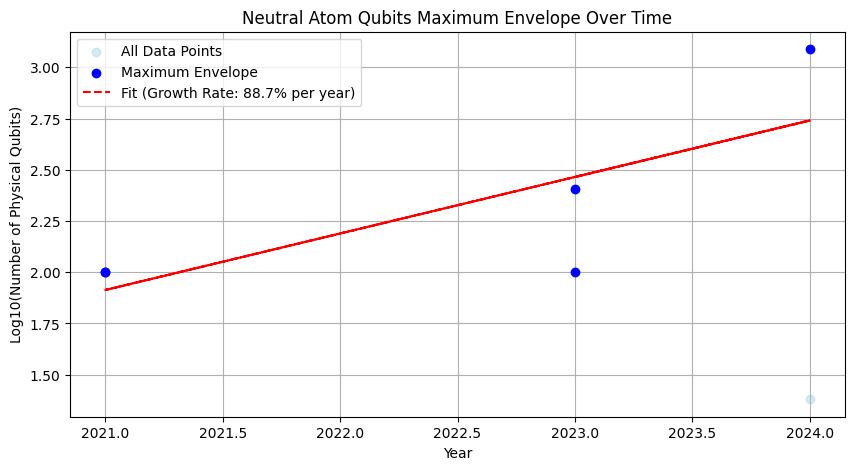

In [11]:
#Graph of neutral atom trends 
neutral_atom_qubits = qpu_metrics[qpu_metrics['Modality'] == 'Neutral Atoms']
#only select onesw with commercially available 
neutral_atom_qubits = neutral_atom_qubits[neutral_atom_qubits['w'].notna()]
neutral_atom_qubits.dropna(subset=['Qubits/ Qumodes', 'w'], inplace=True)
neutral_atom_qubits = neutral_atom_qubits[neutral_atom_qubits['Commercially available?'] != 'Future Plan']
neutral_atom_qubits['Qubits/ Qumodes'] = neutral_atom_qubits['Qubits/ Qumodes'].str.replace(',', '').astype(int)
neutral_atom_qubits['w'] = neutral_atom_qubits['w'].astype(int)
neutral_atom_qubits = neutral_atom_qubits[neutral_atom_qubits['w'] <= 2024]

print(neutral_atom_qubits)


#make a fit of log neutral atom qubits against the year 
neutral_atom_qubits_fit = np.polyfit(neutral_atom_qubits['w'], np.log10(neutral_atom_qubits['Qubits/ Qumodes']), 1)
neutral_atom_qubits_fit = np.poly1d(neutral_atom_qubits_fit)


#make a plot of the neutral atom qubits against the year 
# plt.figure(figsize=(10, 5))
# plt.scatter(neutral_atom_qubits['w'], np.log10(neutral_atom_qubits['Qubits/ Qumodes']), label='Neutral Atom Qubits', color='blue')
# plt.plot(neutral_atom_qubits['w'], neutral_atom_qubits_fit(neutral_atom_qubits['w']), label='Neutral Atom Qubits Fit', color='red')
# plt.xlabel('Year')
# plt.ylabel('Log10(Number of Physical Qubits)')
# plt.title('Neutral Atom Qubits Over Time')


#make a max qubit fit for neutral atoms ie take the point that are higher than any previous point and fit a line to it 

# Create a function to get the cumulative maximum points
def get_max_envelope(df):
    # Sort by year
    df_sorted = df.sort_values('w')
    # Get cumulative maximum
    max_mask = df_sorted['Qubits/ Qumodes'].cummax() == df_sorted['Qubits/ Qumodes']
    return df_sorted[max_mask]

# Get the maximum envelope points
max_envelope = get_max_envelope(neutral_atom_qubits)

# Fit to the log of the maximum envelope points
max_fit = np.polyfit(max_envelope['w'], np.log10(max_envelope['Qubits/ Qumodes']), 1)
max_fit = np.poly1d(max_fit)

# Calculate growth rate
growth_rate = (10**max_fit[1] - 1) * 100

# Create the plot
plt.figure(figsize=(10, 5))
# Plot all points in lighter color
plt.scatter(neutral_atom_qubits['w'], np.log10(neutral_atom_qubits['Qubits/ Qumodes']), 
           label='All Data Points', color='lightblue', alpha=0.5)
# Plot maximum envelope points
plt.scatter(max_envelope['w'], np.log10(max_envelope['Qubits/ Qumodes']), 
           label='Maximum Envelope', color='blue', zorder=5)
# Plot the fit line
plt.plot(neutral_atom_qubits['w'], max_fit(neutral_atom_qubits['w']), 
         label=f'Fit (Growth Rate: {growth_rate:.1f}% per year)', 
         color='red', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Log10(Number of Physical Qubits)')
plt.title('Neutral Atom Qubits Maximum Envelope Over Time')
plt.legend()
plt.grid(True)

# Phontonic Quantum Computers Trends

                                               Sources  \
149  Quantum Insider, https://www.php.cn/faq/179655...   
150  Quantum Insider, https://www.php.cn/faq/179655...   
153   https://quantumcomputinginc.com/products/dirac-2   
154  https://www.hpcwire.com/off-the-wire/qci-launc...   
157  https://thequantuminsider.com/2024/05/07/quand...   
158  https://thequantuminsider.com/2024/05/07/quand...   
159  Ezratty, https://www.quandela.com/wp-content/u...   
193  https://www.quixquantum.com/products/special-p...   
194                   https://arxiv.org/pdf/2203.01801   
197  https://asiatimes.com/2023/10/china-unveils-fa...   
198  https://asiatimes.com/2023/10/china-unveils-fa...   
234  https://www.xanadu.ai/blog/beating-classical-c...   
235  https://spie.org/news/photonics-focus/novdec-2...   
236  https://spie.org/news/photonics-focus/novdec-2...   
237  https://spie.org/news/photonics-focus/novdec-2...   

    Confirmed by manufacturer?                     Comments  \
149     

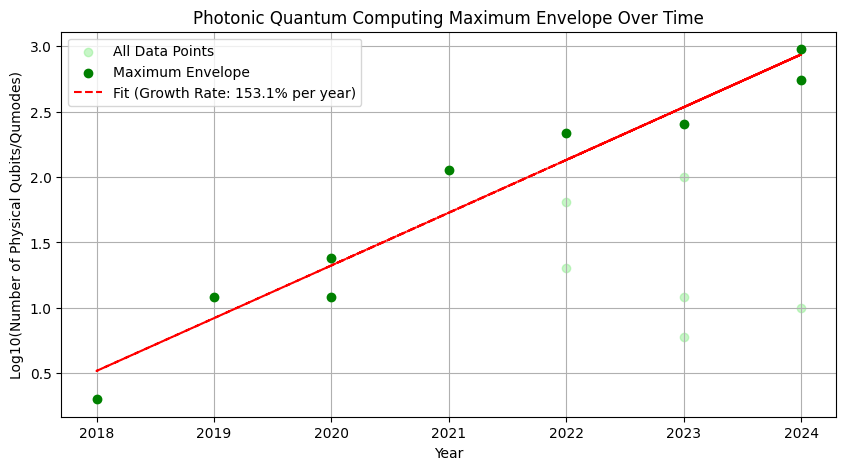

In [12]:
# Graph of photonic quantum computing trends 
photonic_qubits = qpu_metrics[qpu_metrics['Modality'] == 'Photonics']
# Only select ones with dates
photonic_qubits = photonic_qubits[photonic_qubits['w'].notna()]
photonic_qubits.dropna(subset=['Qubits/ Qumodes', 'w'], inplace=True)
photonic_qubits = photonic_qubits[photonic_qubits['Commercially available?'] != 'Future Plan']

# Clean the Qubits/Qumodes column
def clean_number(x):
    try:
        # Convert to string and remove any commas
        x = str(x).replace(',', '')
        # Remove any whitespace
        x = x.strip()
        # Check for obvious non-numeric entries
        if x in ['?', 'N/A', '', 'nan', 'None']:
            return None
        # Extract just the numbers using regex
        import re
        numbers = re.findall(r'\d+', x)
        if numbers:
            return int(numbers[0])
        return None
    except:
        return None

# Clean and convert both columns
photonic_qubits['Qubits/ Qumodes'] = photonic_qubits['Qubits/ Qumodes'].apply(clean_number)
photonic_qubits['w'] = photonic_qubits['w'].apply(clean_number)

# Drop any rows where the conversion failed (resulted in None)
photonic_qubits = photonic_qubits.dropna(subset=['Qubits/ Qumodes', 'w'])
photonic_qubits = photonic_qubits[photonic_qubits['w'] <= 2024]

print(photonic_qubits)

# Get the maximum envelope points
max_envelope = get_max_envelope(photonic_qubits)


#setup quantile regression 
y_data = np.log10(superconducting_qpus['Qubits/ Qumodes'])
x_data = superconducting_qpus['w']
# model = QuantReg(y_data, sm.add_constant(x_data))




# Fit to the log of the maximum envelope points
max_fit = np.polyfit(max_envelope['w'], np.log10(max_envelope['Qubits/ Qumodes']), 1)
max_fit = np.poly1d(max_fit)

# Calculate growth rate
growth_rate = (10**max_fit[1] - 1) * 100

# Create the plot
plt.figure(figsize=(10, 5))
# Plot all points in lighter color
plt.scatter(photonic_qubits['w'], np.log10(photonic_qubits['Qubits/ Qumodes']), 
           label='All Data Points', color='lightgreen', alpha=0.5)
# Plot maximum envelope points
plt.scatter(max_envelope['w'], np.log10(max_envelope['Qubits/ Qumodes']), 
           label='Maximum Envelope', color='green', zorder=5)
# Plot the fit line
plt.plot(photonic_qubits['w'], max_fit(photonic_qubits['w']), 
         label=f'Fit (Growth Rate: {growth_rate:.1f}% per year)', 
         color='red', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Log10(Number of Physical Qubits/Qumodes)')
plt.title('Photonic Quantum Computing Maximum Envelope Over Time')
plt.legend()
plt.grid(True)

# Just Roadmaps Analysis

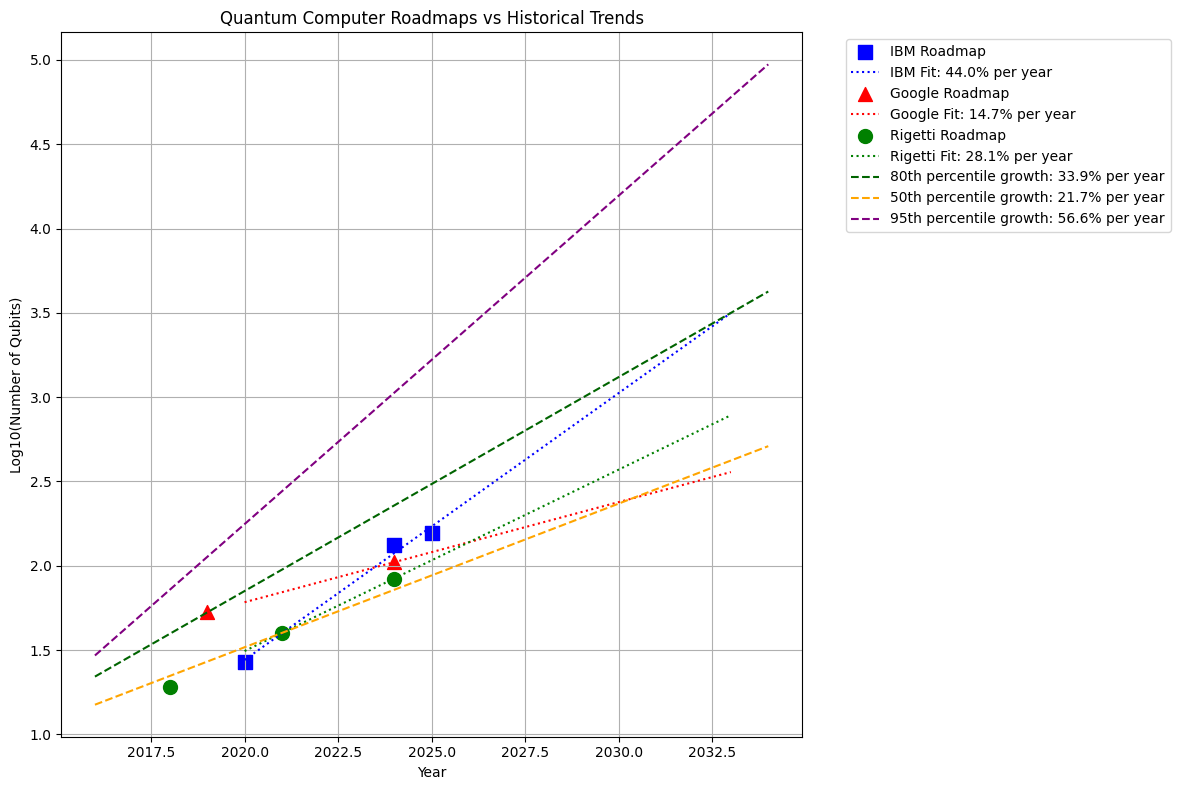


Projected number of qubits in 2030:
80th percentile projection: 1315
50th percentile projection: 234


In [14]:
# Define roadmap data points
roadmaps = {
    'IBM': {
        'data': [(2020, 27), (2024, 133), (2025,156)],
        'color': 'blue',
        'marker': 's'
    },
    'Google': {
        'data': [(2019, 53), (2024, 105)],
        'color': 'red', 
        'marker': '^'
    },
    'Rigetti': {
        'data': [(2018, 19), (2021, 40), (2024, 84)],
        'color': 'green',
        'marker': 'o'
    }
}
# Create figure
plt.figure(figsize=(12, 8))

# Plot roadmap points and fit lines for each company
for company, roadmap_info in roadmaps.items():
    years, qubits = zip(*roadmap_info['data'])
    
    # Plot scatter points
    plt.scatter(years, np.log10(qubits),
               label=f'{company} Roadmap',
               color=roadmap_info['color'],
               marker=roadmap_info['marker'],
               s=100)
    
    # Fit line to roadmap points
    z = np.polyfit(years, np.log10(qubits), 1)
    p = np.poly1d(z)
    
    # Calculate growth rate
    company_growth_rate = (10**z[0] - 1) * 100
    
    # Generate points for the fit line
    x_company_fit = np.linspace(2020, 2033, 100)
    y_company_fit = p(x_company_fit)
    
    # Plot fit line
    plt.plot(x_company_fit, y_company_fit, 
             color=roadmap_info['color'],
             linestyle=':',
             label=f'{company} Fit: {company_growth_rate:.1f}% per year')

# Plot the quantile regression lines
plt.plot(x_fit, y_quantile_fit_80, color='darkgreen', linestyle='--',
         label=f'80th percentile growth: {growth_rate_80:.1f}% per year')
plt.plot(x_fit, y_quantile_fit_50, color='orange', linestyle='--',
         label=f'50th percentile growth: {growth_rate_50:.1f}% per year')
#95 quartile regression line 
plt.plot(x_fit, y_quantile_fit_95, color='purple', linestyle='--',
         label=f'95th percentile growth: {growth_rate_95:.1f}% per year')

plt.xlabel('Year')
plt.ylabel('Log10(Number of Qubits)')
plt.title('Quantum Computer Roadmaps vs Historical Trends')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("Figures/roadmap_comparison.png")
plt.show()

# Print projected values for 2030
print("\nProjected number of qubits in 2030:")
print(f"80th percentile projection: {10**(slope_q80*2030 + intercept_q80):.0f}")
print(f"50th percentile projection: {10**(slope_q50*2030 + intercept_q50):.0f}")


# Roadmap Graph For Presentation

In [13]:
# roadmaps = {
#     'IBM': {
#         'data': [(2020, 27), (2024, 133), (2025, 156), (2028, 1092)],
#         'color': 'blue',
#         'marker': 's'
#     },
#     'Google': {
#         'data': [(2019, 54), (2023, 100), (2025, 1000)],
#         'color': 'red', 
#         'marker': '^'
#     },
#     'Rigetti': {
#         'data': [(2023, 336), (2025, 1000), (2027, 4000)],
#         'color': 'green',
#         'marker': 'o'
#     }
# }


# # Create figure
# plt.figure(figsize=(12, 8))

# # Plot actual IBM roadmap points
# years, qubits = zip(*roadmaps['IBM']['data'])

# # Separate data points before 2025 and after/equal to 2025
# pre_2025_years = [y for y in years if y < 2025]
# pre_2025_qubits = [qubits[i] for i, y in enumerate(years) if y < 2025]
# post_2025_years = [y for y in years if y >= 2025]
# post_2025_qubits = [qubits[i] for i, y in enumerate(years) if y >= 2025]

# # Plot scatter points for IBM - pre 2025 in red
# plt.scatter(pre_2025_years, np.log10(pre_2025_qubits),
#            label='data',
#            color='red',
#            marker=roadmaps['IBM']['marker'],
#            s=100)

# # Plot scatter points for IBM - post 2025 in blue
# if post_2025_years:
#     plt.scatter(post_2025_years, np.log10(post_2025_qubits),
#                label='IBM Roadmap',
#                color=roadmaps['IBM']['color'],
#                marker=roadmaps['IBM']['marker'],
#                s=100)

# # Fit line to roadmap points
# z = np.polyfit(years, np.log10(qubits), 1)
# p = np.poly1d(z)

# # Calculate growth rate
# ibm_growth_rate = (10**z[0] - 1) * 100

# # Generate points for the fit line
# x_company_fit = np.linspace(min(years), 2040, 100)
# y_company_fit = p(x_company_fit)

# # Plot fit line
# plt.plot(x_company_fit, y_company_fit, 
#          color=roadmaps['IBM']['color'],
#          linestyle=':',
#          label=f'IBM Projection: {ibm_growth_rate:.1f}% per year')

# # Add labels and title with darker and bolder styling
# plt.xlabel('Year', fontweight='bold', color='black', fontsize=12)
# plt.ylabel('Number of Physical Qubits', fontweight='bold', color='black', fontsize=12)
# plt.title('IBM Quantum Computer Roadmap Projection', fontweight='bold', fontsize=14)
# plt.legend(prop={'weight':'bold', 'size':10})
# plt.grid(True)

# # Make tick labels darker and bolder
# plt.xticks(range(2020, 2041, 1), fontweight='bold', color='black')
# plt.yticks(fontweight='bold', color='black', fontsize=15)

# # Set y-axis to use scientific notation (10^x format)
# from matplotlib.ticker import ScalarFormatter, LogFormatter, FuncFormatter

# def log_tick_formatter(val, pos=None):
#     return f'$10^{{{int(val)}}}$' if val == int(val) else f'$10^{{{val:.1f}}}$'

# plt.gca().yaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

# plt.show()

## Logical to Physical Ratio Over Time (Not Enough Data)

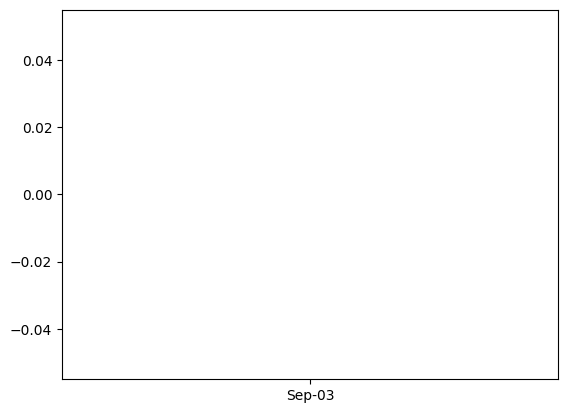

In [16]:
# graph the ratio of physical qubits to logical qubits over time
qpu_metrics = pd.read_csv(csvfile, skiprows=1)
qpu_metrics.dropna(subset=['Logical Qubits', 'Qubits/ Qumodes'], inplace=True)
qpu_metrics['Year'] = qpu_metrics['Latest Status Date']

#only look at superconducting qubits
qpu_metrics = qpu_metrics[qpu_metrics['Modality'] == 'Superconducting']
#convert to numeric
qpu_metrics['Logical Qubits'] = pd.to_numeric(qpu_metrics['Logical Qubits'], errors='coerce')
qpu_metrics['Qubits/ Qumodes'] = pd.to_numeric(qpu_metrics['Qubits/ Qumodes'], errors='coerce')

qpu_metrics['Logical to Physical Ratio'] = qpu_metrics['Logical Qubits'] / qpu_metrics['Qubits/ Qumodes']
# plot the ratio over time
plt.plot(qpu_metrics['Year'], qpu_metrics['Logical to Physical Ratio'])
plt.show()



# Gate Times Over Time

In [14]:
# # original code
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import statsmodels.formula.api as smf

# # Extract years and gate times
# years = np.array([x[0] for x in year_gate_time])
# gate_times = np.array([x[1] for x in year_gate_time])

# # Log-transform the gate times using base 10
# log10_gate_times = np.log10(gate_times)

# # Perform linear regression on the log-transformed gate times
# coefficients = np.polyfit(years, log10_gate_times, 1)
# linear_fit = np.poly1d(coefficients)

# # Print the fit parameters
# slope, intercept = coefficients
# print(f"Slope: {10**slope}")
# print(f"Intercept: {intercept}")
# # Create DataFrame
# df = pd.DataFrame(year_gate_time, columns=["year", "gate_time"])

# # Log-transform the gate times using base 10
# df['log10_gate_time'] = np.log10(df['gate_time'])

# # Perform quantile regression for the 20th percentile on the log-transformed gate times
# quantile = 0.2
# model = smf.quantreg('log10_gate_time ~ year', df)
# res = model.fit(q=quantile)

# # Print the quantile regression results
# print(res.summary())

# # Generate fitted values for a smooth line
# years_smooth = np.linspace(min(df['year']), max(df['year']), 100)
# fitted_quantile_log10_gate_times = res.predict(pd.DataFrame({'year': years_smooth}))
# fitted_quantile_gate_times = 10**fitted_quantile_log10_gate_times

# print(res.params)

# # Plot the original data
# plt.plot(df['year'], df['gate_time'], "o", label="Original Data")

# # Plot the continuous fit line for the quantile regression
# plt.plot(
#     years_smooth,
#     fitted_quantile_gate_times,
#     "-",
#     label=f"Quantile Regression (20th Percentile): Year Decrease={(1-10**res.params['year']):.2%}",
# )

# # Generate fitted values for the linear regression
# fitted_log10_gate_times = linear_fit(years)
# fitted_gate_times = 10**fitted_log10_gate_times

# # Plot the linear regression fit line
# plt.plot(
#     years,
#     fitted_gate_times,
#     "-",
#     label=f"Full Fit : Year Decrease={(1-10**slope):.2%}",
# )

# plt.yscale("log")
# plt.xlabel("Year")
# plt.ylabel("2-Qubit Gate Time (nanoseconds)")
# plt.title("Log Plot of Superconducting 2-Qubit Gate Time vs. Year")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()


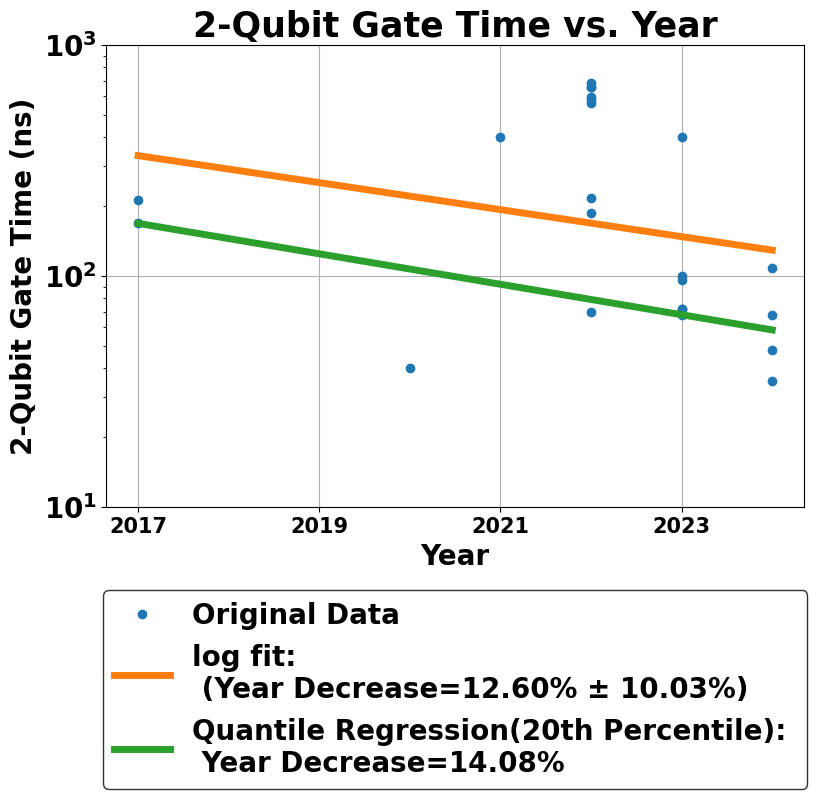

In [10]:

# ==========================================================
# 5. Plot Results
# ==========================================================
# plt.figure(figsize=(10,10))
# plt.figure(figsize=(15, 8))
plt.figure(figsize=(9, 6))

# Original data
plt.plot(df["year"], df["gate_time"], "o", label="Original Data")

# Continuous x-range for smooth lines
years_smooth = np.linspace(min(df["year"]), max(df["year"]), 100)

# -- Linear Regression Fit --
fitted_log10_gate_times = linear_fit(years_smooth)
fitted_gate_times = 10**fitted_log10_gate_times
plt.plot(
    years_smooth,
    fitted_gate_times,
    "-",
    label=(
        "log fit: \n "
        f"(Year Decrease={(1 - 10**slope):.2%} ± {percent_decrease_err:.2f}%)"
    ),
    linewidth=5,
)

# -- Quantile Regression Fit --
fitted_quantile_log10_gate_times = res.predict(pd.DataFrame({"year": years_smooth}))
fitted_quantile_gate_times = 10**fitted_quantile_log10_gate_times


plt.plot(
    years_smooth,
    fitted_quantile_gate_times,
    "-",
    label=(
        f"Quantile Regression(20th Percentile): \n Year Decrease={(1 - 10**slope_q):.2%} "
    ),
    linewidth=5,
)

# Log scale on the y-axis
plt.yscale("log")
plt.xlabel("Year", fontweight='bold', fontsize=20)
plt.ylabel("2-Qubit Gate Time (ns)", fontweight='bold', fontsize=20)

font_properties = FontProperties()
font_properties.set_size(20)
font_properties.set_weight('bold')
#old legend format
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=20, frameon=True, shadow=True, facecolor='white', edgecolor='black', fancybox=True, prop=font_properties)

# plt.legend(bbox_to_anchor=(0.5, -0.35), loc="upper center", fontsize=20, frameon=True, shadow=True, facecolor='white', edgecolor='black', fancybox=True, prop=font_properties)

plt.legend(fontsize=20,
          loc='upper center',
          bbox_to_anchor=(0.5, -0.15), 
          frameon=True,  # Adds a frame around the legend
          facecolor='white',  # White background
          edgecolor='black', prop=font_properties)  # Black border

plt.yticks(fontsize=20, fontweight="bold")
plt.ylim(10, 1000)
plt.xticks(np.arange(2017, 2025, 2), fontsize=15, fontweight="bold")
plt.grid(True)
plt.grid(True)
# plt.tight_layout()
plt.title("2-Qubit Gate Time vs. Year", fontsize=25, fontweight='bold')
plt.savefig("Figures/2-qubit-gate-time-vs-year.png", dpi=300, bbox_inches='tight')
plt.show()


# Gate Error Rate

In [18]:
# extracting data for erorr rate in dataframe

import pandas as pd
from io import StringIO
qpu_metrics

superconducting_qubits = qpu_metrics[qpu_metrics['Modality'] == 'Superconducting']
superconducting_qubits = superconducting_qubits[superconducting_qubits["Commercially available?"] != "Future Plan"]
superconducting_qubits.dropna(subset=["2-Gate Fidelity (Median/Avg)", 'w'], inplace=True)
superconducting_qubits['Fidelity'] = superconducting_qubits['2-Gate Fidelity (Median/Avg)']
superconducting_qubits['Year'] = superconducting_qubits['w']
df = superconducting_qubits[["Year", "Fidelity"]]



In [19]:

# df = superconducting_qubits[["Year", "Fidelity"]]

# Read the raw data string as if it were a CSV file
# df = pd.read_csv(
#     StringIO(data),
#     sep="\t",              # use \t if truly tab-separated, or sep="\s+" if space-separated
#     header=None,           # the dataset has no header row
#     names=["Year", "Technology", "Fidelity"]
# )

# If desired, you can strip any extra whitespace:
df["Year"] = df["Year"].astype(str).str.strip()
# df["Technology"] = df["Technology"].astype(str).str.strip()
df["Fidelity"] = df["Fidelity"].astype(str).str.strip()

# Optionally, remove '%' from Fidelity and convert to float:
df["Fidelity"] = (
    df["Fidelity"]
    .str.replace("%", "", regex=False)    # remove % sign
    .replace("", None)                    # empty strings to None
    .astype(float)                        # convert to float (NaN if missing)
)

print(df)
# analyse the dataframe
cleaned_df = df.dropna(subset=["Fidelity", "Year"])

#drop anything with year after 2024
cleaned_df = cleaned_df[cleaned_df["Year"].astype(str).str.isnumeric()]
cleaned_df["Year"] = cleaned_df["Year"].astype(int)
cleaned_df = cleaned_df[cleaned_df["Year"] <= 2024]

     Year  Fidelity
2    2022   99.7200
3    2024   98.4000
17   2022   96.6000
41   2018   99.4000
42   2019   98.6000
54   2017   95.9800
55   2018   97.1600
85   2022   99.2382
86   2022   99.0096
87   2022   99.3041
88   2022   99.2283
89   2022   99.1828
90   2022   99.2383
99   2022   99.3160
102  2023   99.6921
103  2022   98.8250
104  2022   98.9260
105  2022   99.1686
106  2024   99.7039
121  2024   99.5100
122  2023   99.1400
124  2024   97.0000
132  2020   98.0000
135  2024   96.8600
138  2021   94.0000
139  2023   96.0000
187  2024   99.7000
201  2023   94.9000
202  2023   97.5000
203  2023   97.8000
204  2024   99.2000
205  2018   90.8400
206  2019   94.4200
207  2019   95.2000
208  2020   94.3400
209  2021   94.2800
210  2021   94.6600
211  2021   91.0000
213  2022   90.0000
214  2022   94.6000
215  2022   95.1000
216  2017   87.0000
217  2017   87.5000
220  2023   98.4000
226  2022   99.0000
227  2022   98.0000
228  2022   97.0000


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_62711/2090755939.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Year"].astype(str).str.strip()
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_62711/2090755939.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fidelity"] = df["Fidelity"].astype(str).str.strip()
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_62711/2090755939.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Slope: -0.1135 ± 0.0301
Intercept: -1.1968 ± 0.1485
Yearly percent decrease = 23.00% ± 5.34%
Slope exponentiated: 0.7700300391089323
Intercept: -1.1968492962210096
                         QuantReg Regression Results                          
Dep. Variable:         Log_Error_Rate   Pseudo R-squared:               0.1410
Model:                       QuantReg   Bandwidth:                      0.6311
Method:                 Least Squares   Sparsity:                        1.631
Date:                Thu, 15 May 2025   No. Observations:                   47
Time:                        19:47:57   Df Residuals:                       45
                                        Df Model:                            1
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.4038      0.258     -5.432      0.000      -1.924      -0.883
Years_since_2017    -0.1429 

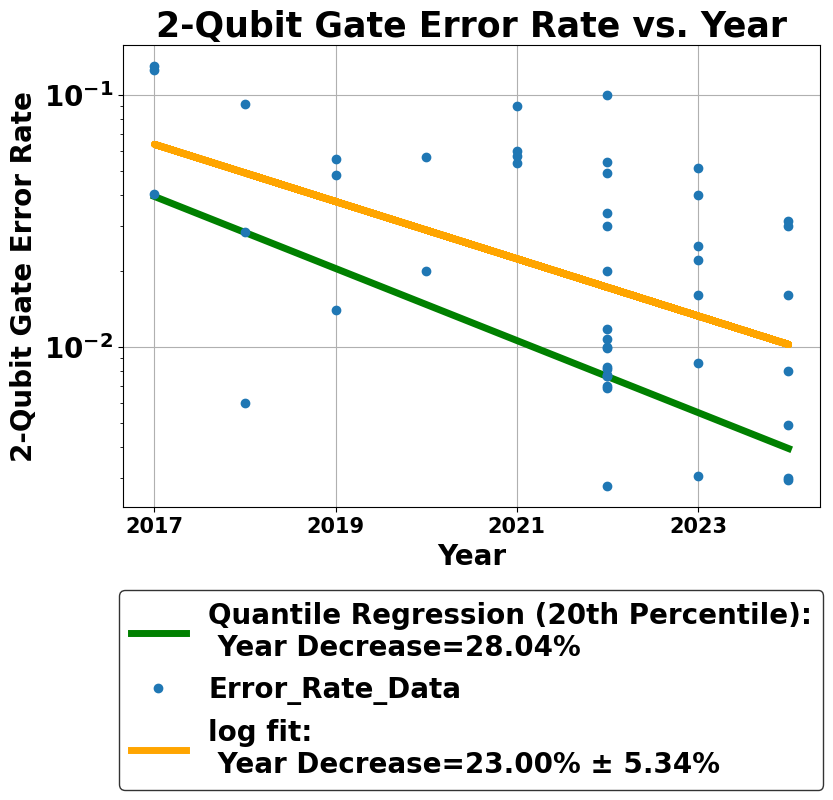

In [18]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import statsmodels.formula.api as smf


# plt.figure(figsize=(9, 6))
# # Filter the dataframe for superconducting technology
# # superconducting_df = cleaned_df[cleaned_df["Technology"] == "Superconducting"]
# superconducting_df = cleaned_df
# superconducting_df = superconducting_df[superconducting_df["Fidelity"].notnull()]

# # Calculate the error rate
# superconducting_df["Error_Rate"] = 1 - .01 * superconducting_df["Fidelity"]
# superconducting_df["Log_Error_Rate"] = np.log10(superconducting_df["Error_Rate"])



# # Calculate years since 2017
# superconducting_df["Years_since_2017"] = superconducting_df["Year"] - 2017

# # Fit a line to the log error rate
# # coefficients = np.polyfit(superconducting_df["Years_since_2017"], superconducting_df["Log Error Rate"], 1)

# coefficients, cov = np.polyfit(
#     superconducting_df["Years_since_2017"], 
#     superconducting_df["Log_Error_Rate"], 
#     1, 
#     cov=True
# )
# slope, intercept = coefficients
# slope_err = np.sqrt(cov[0, 0])  # standard error of the slope
# intercept_err = np.sqrt(cov[1, 1])  # standard error of the intercept
# print(f"Slope: {slope:.4f} ± {slope_err:.4f}")
# print(f"Intercept: {intercept:.4f} ± {intercept_err:.4f}")


# # Convert slope to decimal fraction for the "multiply factor" each year
# yearly_factor = 10**slope  # < 1 if error is decreasing; > 1 if error is increasing
# percent_decrease = (1 - yearly_factor) * 100  # in %

# # Propagate uncertainty
# # df/dm = -ln(10) * 10^m  --> absolute value for the magnitude
# deriv = np.log(10) * 10**slope
# percent_decrease_err = deriv * slope_err * 100  # in %

# print(
#     f"Yearly percent decrease = {percent_decrease:.2f}% "
#     f"± {percent_decrease_err:.2f}%"
# )



# # Print the fit parameters
# slope, intercept = coefficients
# print(f"Slope exponentiated: {10**slope}")
# print(f"Intercept: {intercept}")


# linear_fit = np.poly1d(coefficients)
# years_since_2017 = np.linspace(min(superconducting_df["Years_since_2017"]), max(superconducting_df["Years_since_2017"]), 100)
# fitted_log_error_rate = linear_fit(years_since_2017)

# # plt.title("2-Qubit Error Rate of Superconducting Qubits vs. Year", fontsize=20, fontweight="bold")
# # plt.legend(fontsize=20, loc='upper left', bbox_to_anchor=(1, 1))




# # Perform quantile regression for the 20th percentile on the log-transformed error rates
# quantile = 0.2
# model = smf.quantreg('Log_Error_Rate ~ Years_since_2017', superconducting_df)
# res = model.fit(q=quantile)

# # Print the quantile regression results
# print(res.summary())

# # Generate fitted values for a smooth line
# years_smooth = np.linspace(min(superconducting_df['Years_since_2017']), max(superconducting_df['Years_since_2017']), 100)
# fitted_quantile_log_error_rate = res.predict(pd.DataFrame({'Years_since_2017': years_smooth}))
# fitted_quantile_error_rate = 10**fitted_quantile_log_error_rate

# # Plot the continuous fit line for the quantile regression
# plt.plot(
#     years_smooth + 2017,
#     fitted_quantile_error_rate,
#     "-",
#     label=f"Quantile Regression (20th Percentile):\n Year Decrease={(1-10**res.params['Years_since_2017']):.2%}",
#     color='green',  # Make the line color green
#     linewidth=5  # Increase the line width
# )

# # Plot the year vs error rate
# plt.plot(superconducting_df["Year"], 
#          superconducting_df["Error_Rate"], 
#          "o",
#          label="Error_Rate_Data")
# plt.yscale("log")

# plt.plot(superconducting_df["Year"], 
#          10**linear_fit(superconducting_df["Years_since_2017"]), 
#          "-", 
#          label=f"log fit: \n Year Decrease={(1-10**coefficients[0]):.2%} ± {percent_decrease_err:.2f}%",
#          color='orange',  # Make the line color black
#          linewidth=5)  # Increase the line width
# plt.xlabel("Year", fontsize=20, fontweight="bold")
# plt.ylabel("2-Qubit Gate Error Rate", fontsize=20, fontweight="bold")

# font_properties = FontProperties()
# font_properties.set_size(20)
# font_properties.set_weight('bold')
# #old legend format
# # plt.legend(fontsize=20, 
# #           loc='upper left', 
# #           bbox_to_anchor=(1, 1),
# #           frameon=True,  # Adds a frame around the legend
# #           facecolor='white',  # White background
# #           edgecolor='black', prop=font_properties)  # Black border
# plt.legend(fontsize=20,
#           loc='upper center',
#           bbox_to_anchor=(0.5, -0.15), 
#           frameon=True,  # Adds a frame around the legend
#           facecolor='white',  # White background
#           edgecolor='black', prop=font_properties)  # Black border
# plt.yticks(fontsize=20, fontweight="bold")
# plt.xticks(np.arange(2017, 2025, 2), fontsize=15, fontweight="bold")
# plt.grid(True)

# plt.title("2-Qubit Gate Error Rate vs. Year", fontsize=25, fontweight='bold')
# plt.savefig("Figures/2-qubit-gate-error-vs-year.png", dpi=300, bbox_inches='tight')



# With Error Correction Overhead

In [ ]:
# # Filter and analyze the logical to physical qubit ratio using the surface code formula
# import math

# def surface_code_formula(pP: float) -> float:
#     pL = 1e-18  # Target logical error rate
#     pth = 1e-2  # Threshold error rate
#     numerator = 4 * math.log(math.sqrt(10 * pP / pL))
#     denominator = math.log(pth / pP)
#     fraction = numerator / denominator
#     return (fraction + 1) ** 2  # Return logical to physical ratio directly

# # # Filter the dataframe for superconducting technology and error rates < 0.5%
# # superconducting_df = cleaned_df[cleaned_df["Technology"] == "Superconducting"]
# superconducting_df = superconducting_df[superconducting_df["Fidelity"].notnull()]
# superconducting_df["Error_Rate"] = 1 - .01 * superconducting_df["Fidelity"]
# superconducting_df = superconducting_df[superconducting_df["Error_Rate"] < 0.005]  # Filter for < 0.5% error

# # Calculate logical to physical ratio for each point
# superconducting_df["Logical_to_Physical_Ratio"] = superconducting_df["Error_Rate"].apply(surface_code_formula)
# superconducting_df["Log_Ratio"] = np.log10(superconducting_df["Logical_to_Physical_Ratio"])
# superconducting_df["Years_since_2017"] = superconducting_df["Year"] - 2017

# # Create the plot
# plt.figure(figsize=(12, 8))
# plt.plot(superconducting_df["Year"], 
#          superconducting_df["Logical_to_Physical_Ratio"], 
#          "o",
#          label="Data Points")
# plt.yscale("log")

# # Fit a line to the log ratio
# coefficients, cov = np.polyfit(
#     superconducting_df["Years_since_2017"], 
#     superconducting_df["Log_Ratio"], 
#     1, 
#     cov=True
# )
# slope, intercept = coefficients
# slope_err = np.sqrt(cov[0, 0])
# intercept_err = np.sqrt(cov[1, 1])

# # Calculate and print statistics
# yearly_factor = 10**slope
# percent_change = (yearly_factor - 1) * 100
# deriv = np.log(10) * 10**slope
# percent_change_err = deriv * slope_err * 100

# print(f"Slope: {slope:.4f} ± {slope_err:.4f}")
# print(f"Yearly percent change in ratio = {percent_change:.2f}% ± {percent_change_err:.2f}%")

# # Plot the fit line
# years_since_2017 = np.linspace(min(superconducting_df["Years_since_2017"]), 
#                               max(superconducting_df["Years_since_2017"]), 100)
# linear_fit = np.poly1d(coefficients)
# plt.plot(years_since_2017 + 2017, 
#          10**linear_fit(years_since_2017), 
#          "-", 
#          label=f"Log fit:\nYearly Change={percent_change:.1f}% ± {percent_change_err:.1f}%",
#          color='orange',
#          linewidth=5)

# # Perform quantile regression
# quantile = 0.2
# model = smf.quantreg('Log_Ratio ~ Years_since_2017', superconducting_df)
# res = model.fit(q=quantile)

# # Generate and plot quantile regression line
# years_smooth = np.linspace(min(superconducting_df['Years_since_2017']), 
#                           max(superconducting_df['Years_since_2017']), 100)
# fitted_quantile_log_ratio = res.predict(pd.DataFrame({'Years_since_2017': years_smooth}))
# fitted_quantile_ratio = 10**fitted_quantile_log_ratio

# plt.plot(
#     years_smooth + 2017,
#     fitted_quantile_ratio,
#     "-",
#     label=f"Quantile Regression (20th Percentile):\nYearly Change={(10**res.params['Years_since_2017']-1):.1%}",
#     color='green',
#     linewidth=5
# )

# # Formatting
# plt.xlabel("Year", fontsize=20, fontweight="bold")
# plt.ylabel("Logical to Physical Qubit Ratio", fontsize=20, fontweight="bold")
# plt.yticks(fontsize=20, fontweight="bold")
# plt.xticks(np.arange(2017, 2025, 2), fontsize=15, fontweight="bold")
# plt.grid(True)

# font_properties = FontProperties()
# font_properties.set_size(20)
# font_properties.set_weight('bold')
# plt.legend(fontsize=20,
#           loc='upper left',
#           bbox_to_anchor=(1, 1),
#           frameon=True,
#           facecolor='white',
#           edgecolor='black',
#           prop=font_properties)


In [21]:

# Filter the dataframe for ion trap technology
ion_trap_df = cleaned_df[cleaned_df["Technology"] == "Trapped Ions"]
ion_trap_df = ion_trap_df[ion_trap_df["Fidelity"].notnull()]

# Calculate the error rate
ion_trap_df["Error Rate"] = 1 - .01 * ion_trap_df["Fidelity"]
ion_trap_df["Log Error Rate"] = np.log10(ion_trap_df["Error Rate"])

# Plot the year vs error rate
plt.plot(ion_trap_df["Year"], 
         ion_trap_df["Error Rate"], 
         "o",
         label="Error Rate Data")
plt.yscale("log")

# Calculate years since 2017
ion_trap_df["Years_since_2017"] = ion_trap_df["Year"] - 2017

# Fit a line to the log error rate
coefficients, cov = np.polyfit(
    ion_trap_df["Years_since_2017"], 
    ion_trap_df["Log Error Rate"], 
    1, 
    cov=True
)
slope, intercept = coefficients
slope_err = np.sqrt(cov[0, 0])  # standard error of the slope
intercept_err = np.sqrt(cov[1, 1])  # standard error of the intercept
print(f"Slope: {slope:.4f} ± {slope_err:.4f}")
print(f"Intercept: {intercept:.4f} ± {intercept_err:.4f}")

# Convert slope to decimal fraction for the "multiply factor" each year
yearly_factor = 10**slope  # < 1 if error is decreasing; > 1 if error is increasing
percent_decrease = (1 - yearly_factor) * 100  # in %

# Propagate uncertainty
deriv = np.log(10) * 10**slope
percent_decrease_err = deriv * slope_err * 100  # in %

print(
    f"Yearly percent decrease = {percent_decrease:.2f}% "
    f"± {percent_decrease_err:.2f}%"
)

linear_fit = np.poly1d(coefficients)
years_since_2017 = np.linspace(min(ion_trap_df["Years_since_2017"]), max(ion_trap_df["Years_since_2017"]), 100)
fitted_log_error_rate = linear_fit(years_since_2017)
plt.plot(ion_trap_df["Year"], 
         10**linear_fit(ion_trap_df["Years_since_2017"]), 
         "-", 
         label=f"log fit: Year Decrease={(1-10**coefficients[0]):.2%} ± {percent_decrease_err:.2f}%")
plt.xlabel("Year")
plt.ylabel("Error Rate")
plt.title("2-Qubit Error Rate of Trapped Ion Qubits vs. Year")
plt.grid(True)
plt.legend()

# Print the fit parameters
slope, intercept = coefficients
print(f"Slope exponentiated: {10**slope}")
print(f"Intercept: {intercept}")



KeyError: 'Technology'

In [12]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit

# # Provided data
# data = {
#     "Year": [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
#     "Superconducting_2Gate": [
#         0.9598,
#         0.994,
#         0.986,
#         0.98,
#         0.9466,
#         0.9972,
#         0.996921,
#         0.997039,
#     ],
#     "Superconducting_1Gate": [
#         0.999,
#         0.9981,
#         0.9988,
#         0.999,
#         0.9991,
#         0.999783,
#         0.999684,
#         0.9992,
#     ],
#     "TrappedIons_2Gate": [None, None, 0.973, 0.995, 0.9977, 0.997, 0.99914, 0.9997],
#     "TrappedIons_1Gate": [
#         None,
#         None,
#         0.996,
#         0.9997,
#         0.99996,
#         0.9998,
#         0.999979,
#         0.999992,
#     ],
# }
# # Convert to DataFrame
# df = pd.DataFrame(data)

# # Calculate 1 - Fidelity values
# df["Superconducting_2Gate"] = 1 - df["Superconducting_2Gate"]
# df["Superconducting_1Gate"] = 1 - df["Superconducting_1Gate"]
# df["TrappedIons_2Gate"] = 1 - df["TrappedIons_2Gate"]
# df["TrappedIons_1Gate"] = 1 - df["TrappedIons_1Gate"]

# # Define years for the x-axis
# years = df["Year"]
# # Define "years since 2017" for the x-axis
# df["Years_since_2017"] = df["Year"] - 2017
# years_since_2017 = df["Years_since_2017"]

# # Log transformation and removing NaN values
# df["log_Superconducting_2Gate"] = np.log10(df["Superconducting_2Gate"])
# df["log_Superconducting_1Gate"] = np.log10(df["Superconducting_1Gate"])
# df["log_TrappedIons_2Gate"] = np.log10(df["TrappedIons_2Gate"])
# df["log_TrappedIons_1Gate"] = np.log10(df["TrappedIons_1Gate"])

# # Removing rows with NaN for each category
# df_clean_super_2g = df.dropna(subset=["log_Superconducting_2Gate"])
# df_clean_super_1g = df.dropna(subset=["log_Superconducting_1Gate"])
# df_clean_ions_2g = df.dropna(subset=["log_TrappedIons_2Gate"])
# df_clean_ions_1g = df.dropna(subset=["log_TrappedIons_1Gate"])

# # Include logical to physical qubit ratio
# pl = 1e-18  # Define pl before using it
# scaling_factor_future = (
#     lambda fidelity: 2 * (4 * np.log(10 * pl) / np.log(100 * fidelity) - 1) ** 2 - 1
# )
# df["scaling_factor_future"] = np.log10(
#     scaling_factor_future(df["Superconducting_2Gate"])
# )
# df_clean_scaling = df.dropna(subset=["scaling_factor_future"])

# df["scaling_factor_iontrap"] = np.log10(scaling_factor_future(df["TrappedIons_2Gate"]))
# df_clean_scaling_iontrap = df.dropna(subset=["scaling_factor_iontrap"])


# # Linear fit for each category
# def linear_func(x, m, c):
#     return m * x + c


# # Fitting for Superconducting 2Gate
# popt_super_2g, _ = curve_fit(
#     linear_func,
#     df_clean_super_2g["Years_since_2017"],
#     df_clean_super_2g["log_Superconducting_2Gate"],
# )

# # Fitting for Superconducting 1Gate
# popt_super_1g, _ = curve_fit(
#     linear_func,
#     df_clean_super_1g["Years_since_2017"],
#     df_clean_super_1g["log_Superconducting_1Gate"],
# )

# # Fitting for TrappedIons 2Gate
# popt_ions_2g, _ = curve_fit(
#     linear_func,
#     df_clean_ions_2g["Years_since_2017"],
#     df_clean_ions_2g["log_TrappedIons_2Gate"],
# )

# # Fitting for TrappedIons 1Gate
# popt_ions_1g, _ = curve_fit(
#     linear_func,
#     df_clean_ions_1g["Years_since_2017"],
#     df_clean_ions_1g["log_TrappedIons_1Gate"],
# )

# # Fit logical to physical for superconducting
# popt_scaling, _ = curve_fit(
#     linear_func,
#     df_clean_scaling["Years_since_2017"],
#     df_clean_scaling["scaling_factor_future"],
# )

# pop_scaling_iontrap, _ = curve_fit(
#     linear_func,
#     df_clean_scaling_iontrap["Years_since_2017"],
#     df_clean_scaling_iontrap["scaling_factor_iontrap"],
# )

# # Plotting the results
# plt.figure(figsize=(10, 6))

# # Exponentiating the parameters to the power of 10
# exp_popt_super_2g = 10 ** np.array(popt_super_2g)
# exp_popt_super_1g = 10 ** np.array(popt_super_1g)
# exp_popt_ions_2g = 10 ** np.array(popt_ions_2g)
# exp_popt_ions_1g = 10 ** np.array(popt_ions_1g)


# # Plot for Superconducting 2Gate
# plt.scatter(
#     df_clean_super_2g["Year"],
#     df_clean_super_2g["log_Superconducting_2Gate"],
#     label="Superconducting 2Gate (data)",
#     color="blue",
# )
# plt.plot(
#     df_clean_super_2g["Year"],
#     linear_func(df_clean_super_2g["Years_since_2017"], *popt_super_2g),
#     label=f"Superconducting 2Gate (fit): year percentage decrease={(1- exp_popt_super_2g[0]):.1%}",
#     color="blue",
# )
# # percentage_decrease={(1- exp_popt_super_2g[0]):.2%}

# # Plot for Superconducting 1Gate
# # plt.scatter(
# #     df_clean_super_1g["Year"],
# #     df_clean_super_1g["log_Superconducting_1Gate"],
# #     label="Superconducting 1Gate (data)",
# #     color="green",
# # )
# # plt.plot(
# #     df_clean_super_1g["Year"],
# #     linear_func(df_clean_super_1g["Years_since_2017"], *popt_super_1g),
# #     label=f"Superconducting 1Gate (fit): m={exp_popt_super_1g[0]:.2}, c={exp_popt_super_1g[1]:.2}",
# #     color="green",
# # )

# # Plot for TrappedIons 2Gate
# plt.scatter(
#     df_clean_ions_2g["Year"],
#     df_clean_ions_2g["log_TrappedIons_2Gate"],
#     label="TrappedIons 2Gate (data)",
#     color="red",
# )
# plt.plot(
#     df_clean_ions_2g["Year"],
#     linear_func(df_clean_ions_2g["Years_since_2017"], *popt_ions_2g),
#     label=f"TrappedIons 2Gate (fit): year percentage decrease={(1-exp_popt_ions_2g[0]):.1%}",
#     color="red",
# )

# # label=f"TrappedIons 2Gate (fit): m={exp_popt_ions_2g[0]:.2}, c={exp_popt_ions_2g[1]:.2}"

# # Plot for TrappedIons 1Gate
# # plt.scatter(
# #     df_clean_ions_1g["Year"],
# #     df_clean_ions_1g["log_TrappedIons_1Gate"],
# #     label="TrappedIons 1Gate (data)",
# #     color="orange",
# # )
# # plt.plot(
# #     df_clean_ions_1g["Year"],
# #     linear_func(df_clean_ions_1g["Years_since_2017"], *popt_ions_1g),
# #     label=f"TrappedIons 1Gate (fit): m={exp_popt_ions_1g[0]:.2}, c={exp_popt_ions_1g[1]:.2}",
# #     color="orange",
# # )

# # Plot logical to physical ratio fit
# # plt.scatter(df_clean_scaling["Year"], df_clean_scaling["scaling_factor_future"], label="Logical/Physical Ratio (data)", color="purple")
# # plt.plot(df_clean_scaling["Year"], linear_func(df_clean_scaling["Years_since_2017"], *popt_scaling), label=f"Logical/Physical Ratio (fit): m={popt_scaling[0]:.2e}, c={popt_scaling[1]:.2e}", color="purple")

# # Labels and title
# plt.xlabel("Year")
# plt.ylabel("log(Error rate)")
# plt.title("2-Qubit Gate Error Rate Over Time: Superconducting vs. Trapped Ions")
# plt.legend(fontsize=12)
# plt.grid(True)
# plt.show()


# # I want to print out the the fit intercept exponentiated for each group
# print(
#     f"Superconducting 2 gate fit intercep (initial error rate)t: {10**popt_super_2g[1]}"
# )
# print(f"TrappedIons 2 gate fit intercept (initial error rate): {10**popt_ions_2g[1]}")

# Mapping Out Physical Qubits Over Time

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_13611/90900053.py:57: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(


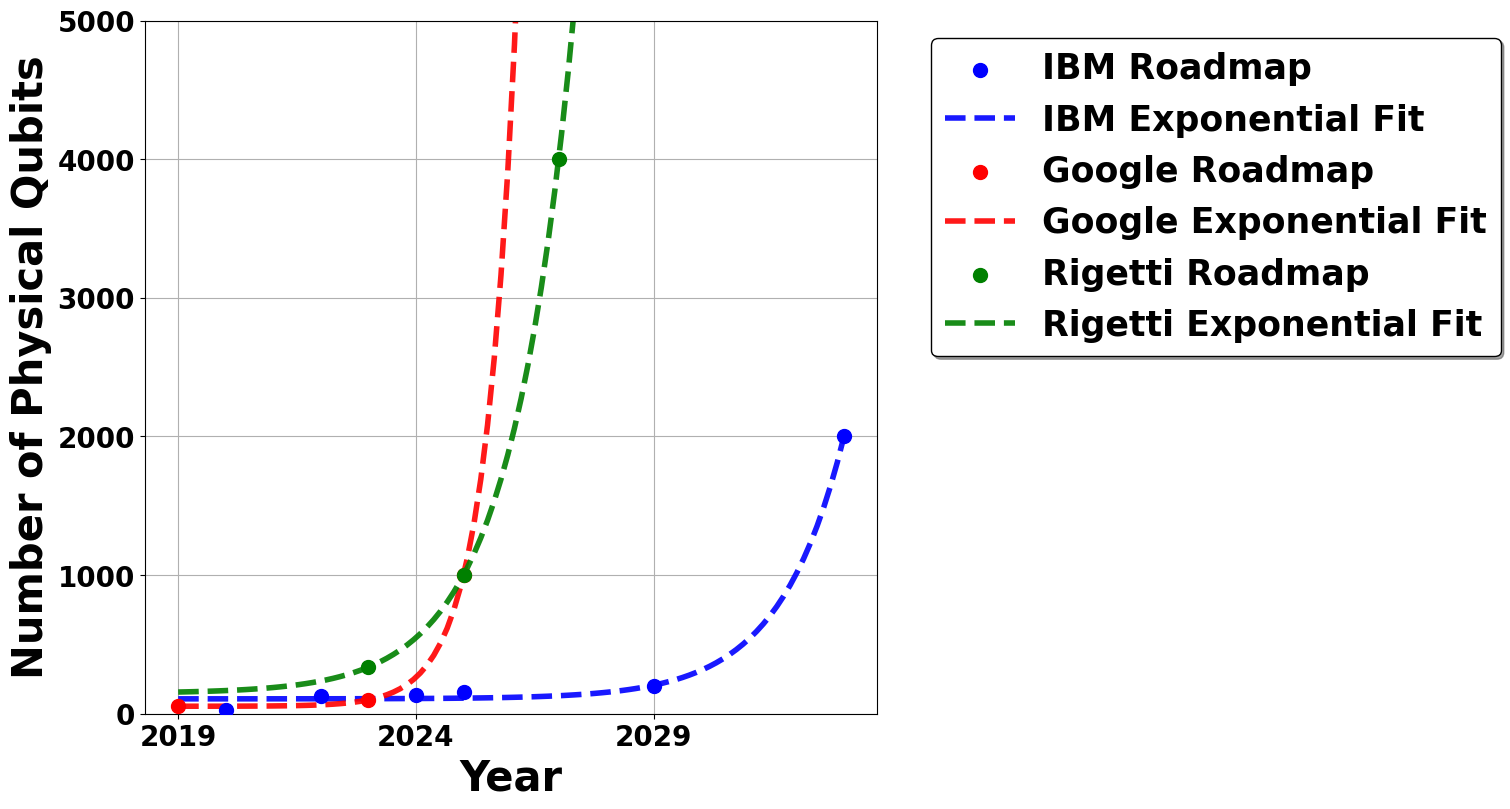

In [13]:
# graph roadmaps



import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Roadmap data
IBM_roadmap = {
    2020: 27,
    2022: 127,
    2024: 133,
    2025: 156,
    2029: 200,
    2033: 2000,
}

Google_roadmap = {
    2019: 54,
    2023: 100,
    2025: 1000,
}

Rigetti_roadmap = {
    2023: 336,
    2025: 1000,
    2027: 4000,
}

best_system_roadmap = {
    2016:22,
    2018:48, 
    2018:72, 
    2021:126,
    2022:433,
    2023:1120,
}


# Define improved exponential function for fitting
def exp_func(x, a, b, c):
    """Exponential function of the form a * exp(b * (x - x0)) + c"""
    return a * np.exp(b * (x - 2019)) + c


# Function to fit and plot data
def fit_and_plot_roadmap(data_dict, label, color):
    years = np.array(list(data_dict.keys()))
    qubits = np.array(list(data_dict.values()))

    # Initial parameter guesses
    p0 = [min(qubits), 0.5, 0]

    # Fit with better bounds
    try:
        popt, _ = curve_fit(
            exp_func, years, qubits, p0=p0, bounds=([0, -2, -1000], [10000, 2, 1000])
        )
    except RuntimeError:
        print(f"Fitting failed for {label}")
        return None

    # Generate smooth curve for plotting
    # years_smooth = np.linspace(2019, max(years), 100)
    years_smooth = np.linspace(2019, 2033, 100)
    fit_smooth = exp_func(years_smooth, *popt)

    # Plot original data points
    plt.scatter(years, qubits, color=color, label=f"{label} Roadmap", zorder=5, s=100)

    # Plot fitted curve
    plt.plot(
        years_smooth,
        fit_smooth,
        "--",
        color=color,
        label=f"{label} Exponential Fit",
        alpha=0.9,
        linewidth=4,
    )

    return popt

# Create plot
# plt.figure(figsize=(12, 8))
#make figsize long horizontally
plt.figure(figsize=(15, 8))
# Fit and plot each company's data
fit_and_plot_roadmap(IBM_roadmap, "IBM", "blue")
fit_and_plot_roadmap(Google_roadmap, "Google", "red")
fit_and_plot_roadmap(Rigetti_roadmap, "Rigetti", "green")
# fit_and_plot_roadmap(best_system_roadmap, "Best System", "purple")

# Customize plot
plt.xlabel("Year", fontsize=30, fontweight='bold')
plt.ylabel("Number of Physical Qubits", fontsize=30, fontweight='bold')
# plt.title("Quantum Computing Roadmaps: Projected Number of Physical Qubits", fontsize=19, weight="bold")
plt.grid(True)


font_properties = FontProperties()
font_properties.set_size(25)
font_properties.set_weight('bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=25, frameon=True, shadow=True, facecolor='white', edgecolor='black', fancybox=True, prop=font_properties)
plt.ylim(0, 5000)

#make the legend larger and towards the right
# 

# Use logarithmic scale for y-axis since the growth is exponential


# Add minor gridlines
plt.grid(True, which="minor", alpha=0.9)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.xticks(fontsize=20, fontweight='bold')
plt.xticks(np.arange(2019, 2032, 5), fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.show()

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_13611/954959904.py:44: RuntimeWarning: overflow encountered in scalar power
  problem_size = 2**logical_qubits
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_13611/954959904.py:54: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(


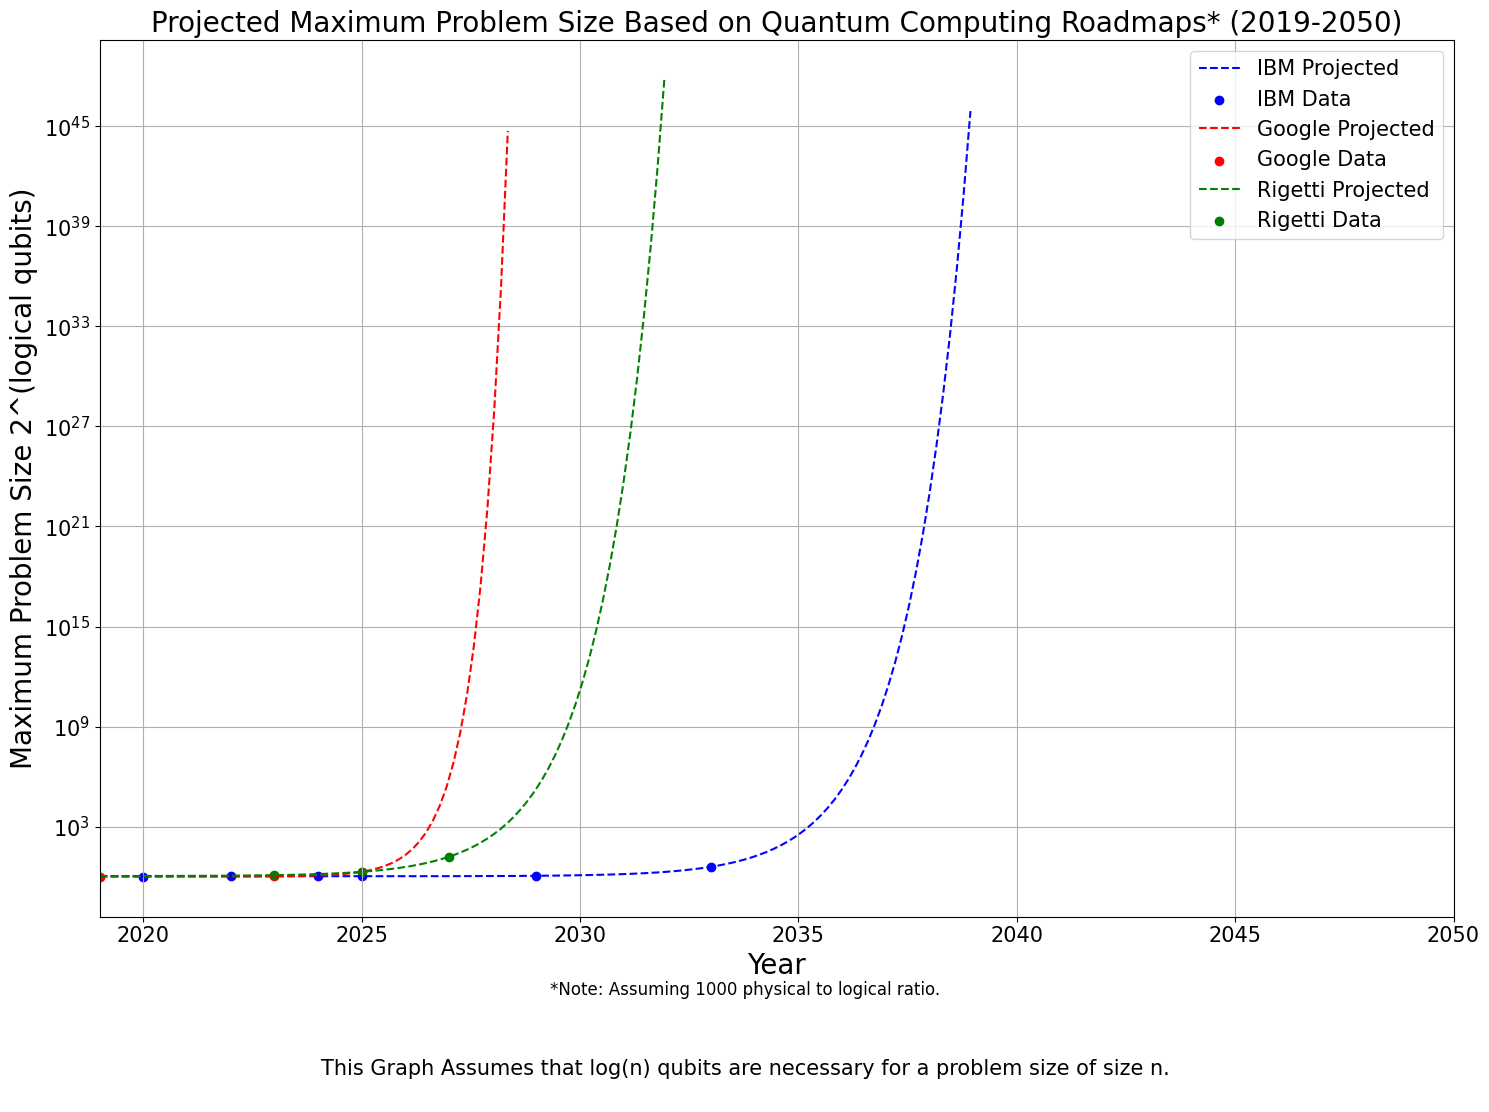

In [14]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Original roadmap data
IBM_roadmap = {
    2020: 27,
    2022: 127,
    2024: 133,
    2025: 156,
    2029: 200,
    2033: 2000,
}

Google_roadmap = {
    2019: 54,
    2023: 100,
    2025: 1000,
}

Rigetti_roadmap = {
    2023: 336,
    2025: 1000,
    2027: 4000,
}

# Constants
PHYSICAL_TO_LOGICAL_RATIO = 1000  # 10^3 physical qubits per logical qubit
MAX_PROBLEM_SIZE = 1e50  # Maximum problem size to consider


def exp_func(x, a, b, c):
    """Exponential function for fitting"""
    return a * np.exp(b * (x - 2019)) + c


def calculate_problem_size(physical_qubits):
    """Calculate problem size from physical qubits"""
    logical_qubits = physical_qubits / PHYSICAL_TO_LOGICAL_RATIO
    # Only calculate for positive logical qubits
    if logical_qubits <= 0:
        return 0
    # Cap the maximum problem size
    problem_size = 2**logical_qubits
    return min(problem_size, MAX_PROBLEM_SIZE)


def fit_and_extrapolate(data_dict, company_name, color):
    # Fit original data
    years = np.array(list(data_dict.keys()))
    qubits = np.array(list(data_dict.values()))

    try:
        popt, _ = curve_fit(
            exp_func,
            years,
            qubits,
            p0=[min(qubits), 0.5, 0],
            bounds=([0, -2, -1000], [10000, 2, 1000]),
        )
    except RuntimeError:
        print(f"Fitting failed for {company_name}")
        return None

    # Generate extrapolated years and corresponding qubit numbers
    years_extended = np.linspace(
        2019, 2050, 200
    )  # Increased number of points for smoother curve
    qubits_extended = exp_func(years_extended, *popt)

    # Calculate problem sizes
    problem_sizes = np.array([calculate_problem_size(q) for q in qubits_extended])

    # Only plot where problem size is > 0 and < MAX_PROBLEM_SIZE
    valid_mask = (problem_sizes > 0) & (problem_sizes < MAX_PROBLEM_SIZE)

    if np.any(valid_mask):
        plt.plot(
            years_extended[valid_mask],
            problem_sizes[valid_mask],
            "--",
            color=color,
            label=f"{company_name} Projected",
            alpha=0.99,
        )

        # Plot original data points converted to problem size
        original_problem_sizes = [calculate_problem_size(q) for q in qubits]
        valid_original = np.array(original_problem_sizes) < MAX_PROBLEM_SIZE
        plt.scatter(
            years[valid_original],
            np.array(original_problem_sizes)[valid_original],
            color=color,
            label=f"{company_name} Data",
        )

        # Add the year when MAX_PROBLEM_SIZE is reached
        # if np.any(problem_sizes >= MAX_PROBLEM_SIZE):
        #     year_max = years_extended[problem_sizes >= MAX_PROBLEM_SIZE][0]
        #     plt.annotate(f'{company_name}\nreaches max\nat {year_max:.1f}',
        #                 xy=(year_max, MAX_PROBLEM_SIZE),
        #                 xytext=(5, 5), textcoords='offset points',
        #                 fontsize=8, color=color)


# Create plot
plt.figure(figsize=(15, 10))  # Increased figure size for better visibility

# Fit and plot each company's data
fit_and_extrapolate(IBM_roadmap, "IBM", "blue")
fit_and_extrapolate(Google_roadmap, "Google", "red")
fit_and_extrapolate(Rigetti_roadmap, "Rigetti", "green")

# Customize plot
plt.xlabel("Year", fontsize=20)  # Enlarged x-axis label
plt.ylabel("Maximum Problem Size 2^(logical qubits)", fontsize=20)  # Enlarged y-axis label
plt.yticks(fontsize=15)  # Enlarged tick labels
plt.xticks(fontsize=15)  # Enlarged tick labels
plt.title(
    "Projected Maximum Problem Size Based on Quantum Computing Roadmaps* (2019-2050)",
    fontsize=20,
)
plt.grid(True)
plt.legend(fontsize=15)
plt.figtext(0.5, 0.0, "*Note: Assuming 1000 physical to logical ratio.", ha="center", fontsize=12)

# Use logarithmic scale for y-axis
plt.yscale("log")

# Add minor gridlines
plt.grid(True, which="minor", alpha=0.2)

# Set x-axis limits explicitly
plt.xlim(2019, 2050)

# Add blurb
blurb = (
    "This Graph Assumes that log(n) qubits are necessary for a problem size of size n.\n" 

)
plt.figtext(0.5, -0.1, blurb, wrap=True, horizontalalignment='center', fontsize=15)

# Adjust layout
plt.tight_layout()

plt.show()


In [15]:
# now lets look at sensitiv